In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('spotify_updated.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'spotify_updated.csv'

In [63]:
df.head()

,Unnamed: 0,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [71]:
coldplay_songs = df[df['artists'].apply(lambda x: 'coldplay' in x.lower())]
coldplay_songs['coldplay'] = True
amos_songs = df[df['artists'].apply(lambda x: 'tori amos' in x.lower())]
amos_songs['coldplay'] = False

coldplay_amos = pd.concat([coldplay_songs, amos_songs])

subset = coldplay_amos

/var/folders/_1/8fw6702n7g37rnlh6_20h3700000gn/T/ipykernel_81484/1844599231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coldplay_songs['coldplay'] = True
/var/folders/_1/8fw6702n7g37rnlh6_20h3700000gn/T/ipykernel_81484/1844599231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amos_songs['coldplay'] = False


In [72]:
features = subset.columns[8:-2]
X = subset[features]

In [73]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
# convert to Z-scores

## Compressing multiple columns to just 2 columns

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_reduced = pca.fit_transform(scaled_features)



# Making a scatter plot

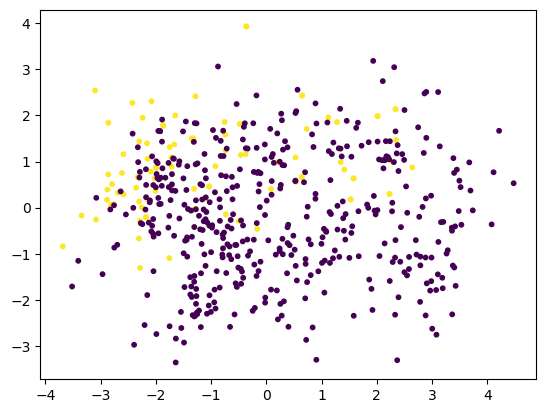

In [75]:
from matplotlib import pyplot as plt 
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=10, c=subset['coldplay'])